Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

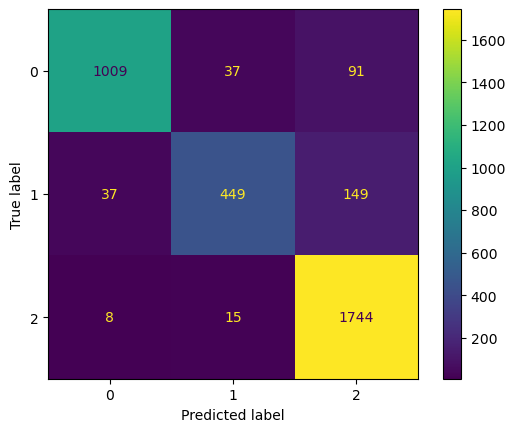



Test Result:
Accuracy Score: 72.43%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2  accuracy   macro avg  \
precision    0.734694    0.439560    0.770000  0.724294    0.648085   
recall       0.760563    0.251572    0.871041  0.724294    0.627725   
f1-score     0.747405    0.320000    0.817410  0.724294    0.628272   
support    284.000000  159.000000  442.000000  0.724294  885.000000   

           weighted avg  
precision      0.699303  
recall         0.724294  
f1-score       0.705580  
support      885.000000  
_______________________________________________
Confusion Matrix:


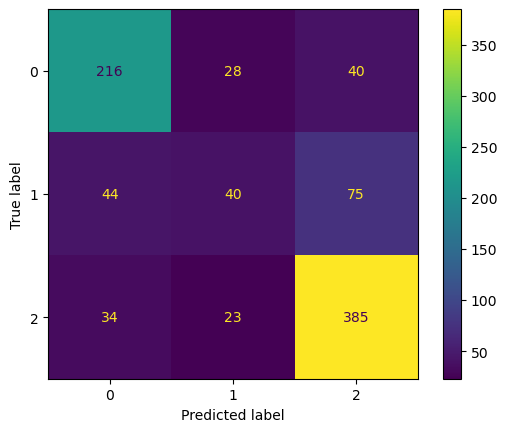

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best params: {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 82.57%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1            2  accuracy    macro avg  \
precision     0.895508    0.689038     0.820600  0.825657     0.801715   
recall        0.806508    0.485039     0.960385  0.825657     0.750644   
f1-score      0.848681    0.569316     0.885007  0.825657     0.767668   
support    1137.000000  635.000000  1767.000000  0.825657  3539.000000   

           weighted avg  
precision      0.821060  
recall         0.825657  
f1-score       0.816692  
support     3539.000000  
_______________________________________________
Confusion Matrix:


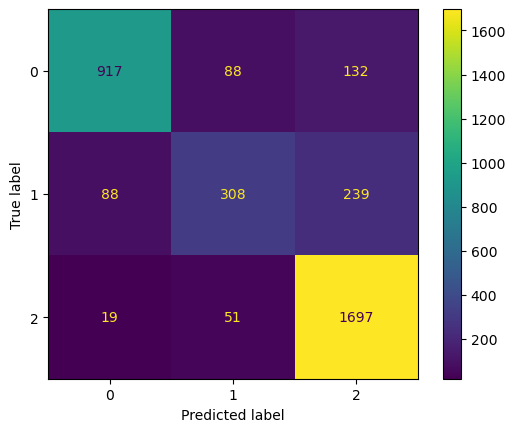



Test Result:
Accuracy Score: 76.38%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2  accuracy   macro avg  \
precision    0.822835    0.537190    0.788235  0.763842    0.716087   
recall       0.735915    0.408805    0.909502  0.763842    0.684741   
f1-score     0.776952    0.464286    0.844538  0.763842    0.695258   
support    284.000000  159.000000  442.000000  0.763842  885.000000   

           weighted avg  
precision      0.754235  
recall         0.763842  
f1-score       0.754533  
support      885.000000  
_______________________________________________
Confusion Matrix:


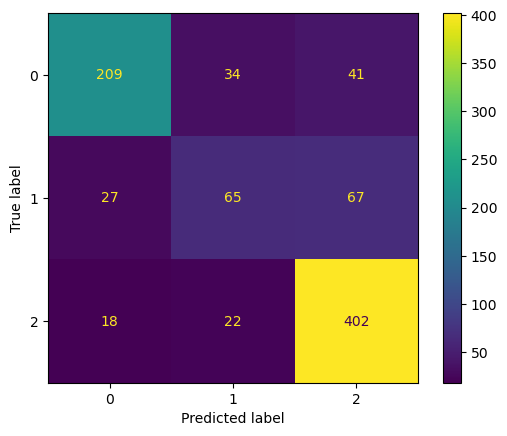

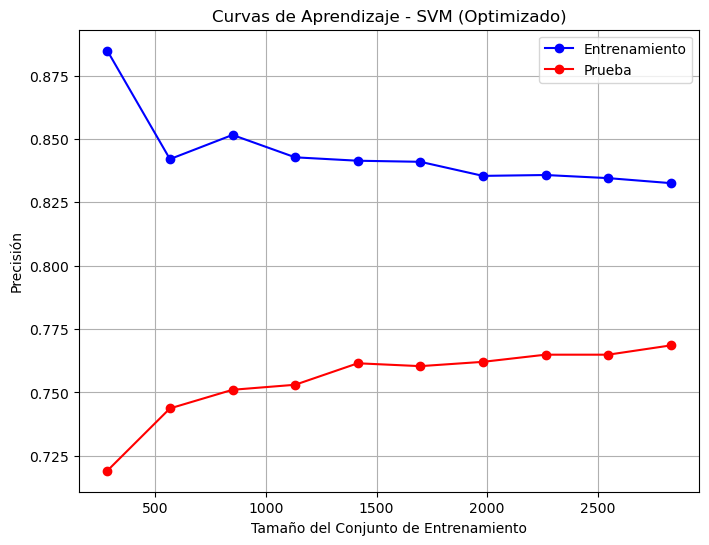

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC

warnings.filterwarnings('ignore')

# Cargar el archivo CSV.
file_path = 'data.csv'  
data = pd.read_csv(file_path, delimiter=';')

# Ver las primeras filas del conjunto de datos.
print(data.columns)
print(data.info())
print(data.describe())

# Ver la variable objetivo.
print(data['Target'].unique())
print(data['Target'].value_counts())

# Codificar la variable objetivo (Target).
encoder = LabelEncoder()
data['Target'] = encoder.fit_transform(data['Target'])  # ['Dropout', 'Enrolled', 'Graduate']

# Separar características (X) y objetivo (y).
X = data.drop(columns=['Target'])
y = data['Target']

# Dividir en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Definir la función print_score.
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print('Train Result:\n================================================')
        print(f'Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%')
        print('_______________________________________________')
        print(f'CLASSIFICATION REPORT:\n{clf_report}')
        print('_______________________________________________')
        print(f'Confusion Matrix:')
        cm = confusion_matrix(y_train, pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=clf.classes_)
        disp.plot()
        plt.grid(False)
        plt.show()
        print('\n')
        
    else:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print('Test Result:\n================================================')        
        print(f'Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%')
        print('_______________________________________________')
        print(f'CLASSIFICATION REPORT:\n{clf_report}')
        print('_______________________________________________')
        print(f'Confusion Matrix:')
        cm = confusion_matrix(y_test, pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=clf.classes_)
        disp.plot()
        plt.grid(False)
        plt.show()

# Escalar las características numéricas.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Support Vector machine.
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

# Definir results_df como un DataFrame vacío antes de agregar resultados.
results_df = pd.DataFrame(columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df_2 = pd.DataFrame(data=[['Support Vector Machine', train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2])
results_df

# Ajuste de hiperparámetros de los modelos.
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {'C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          'kernel':('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring='accuracy')
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f'Best params: {best_params}')

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[['Tuned Support Vector Machine', train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
results_df = pd.concat([results_df, results_df_2])
results_df

# Curvas de aprendizaje con el modelo optimizado (SVM).
train_sizes, train_scores, test_scores = learning_curve(
    svm_clf, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Promediar las puntuaciones de entrenamiento y prueba.
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Graficar las curvas de aprendizaje.
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Entrenamiento', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Prueba', color='red', marker='o')
plt.title('Curvas de Aprendizaje - SVM (Optimizado)')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Precisión')
plt.legend(loc='best')
plt.grid(True)
plt.show()
